<a href="https://colab.research.google.com/github/ceban-vasile/sigmoid-projects/blob/main/First_attempt_tech_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Initial Exploration**

In [2]:
data = pd.read_csv("Healthcare-Diabetes.csv")

In [3]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


describe() provides statistical insights into the dataset, such as mean, standard deviation, min, and max values for each column, helping identify potential outliers or issues with data distribution.

Data Visualization

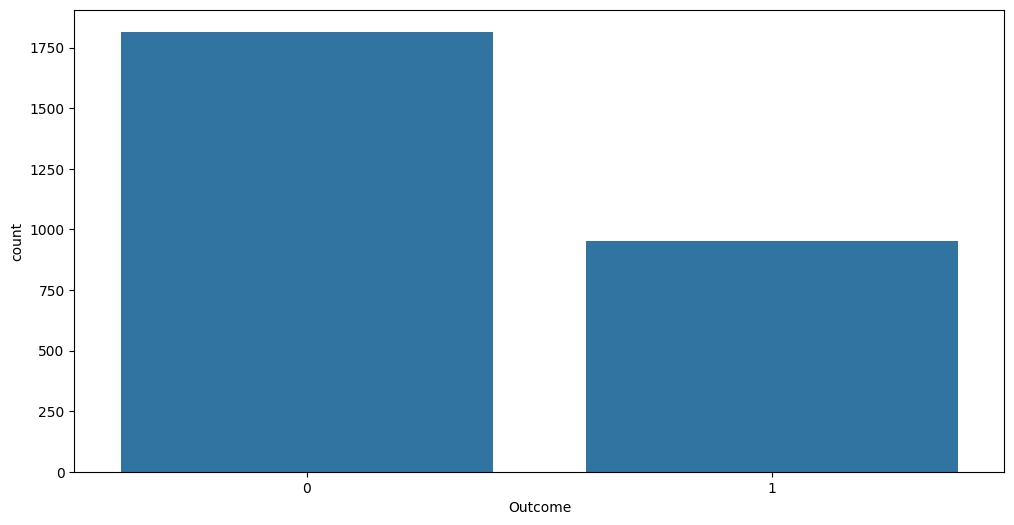

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

The countplot reveals the balance between diabetic (1) and non-diabetic (0) cases

**Observing Outliers**

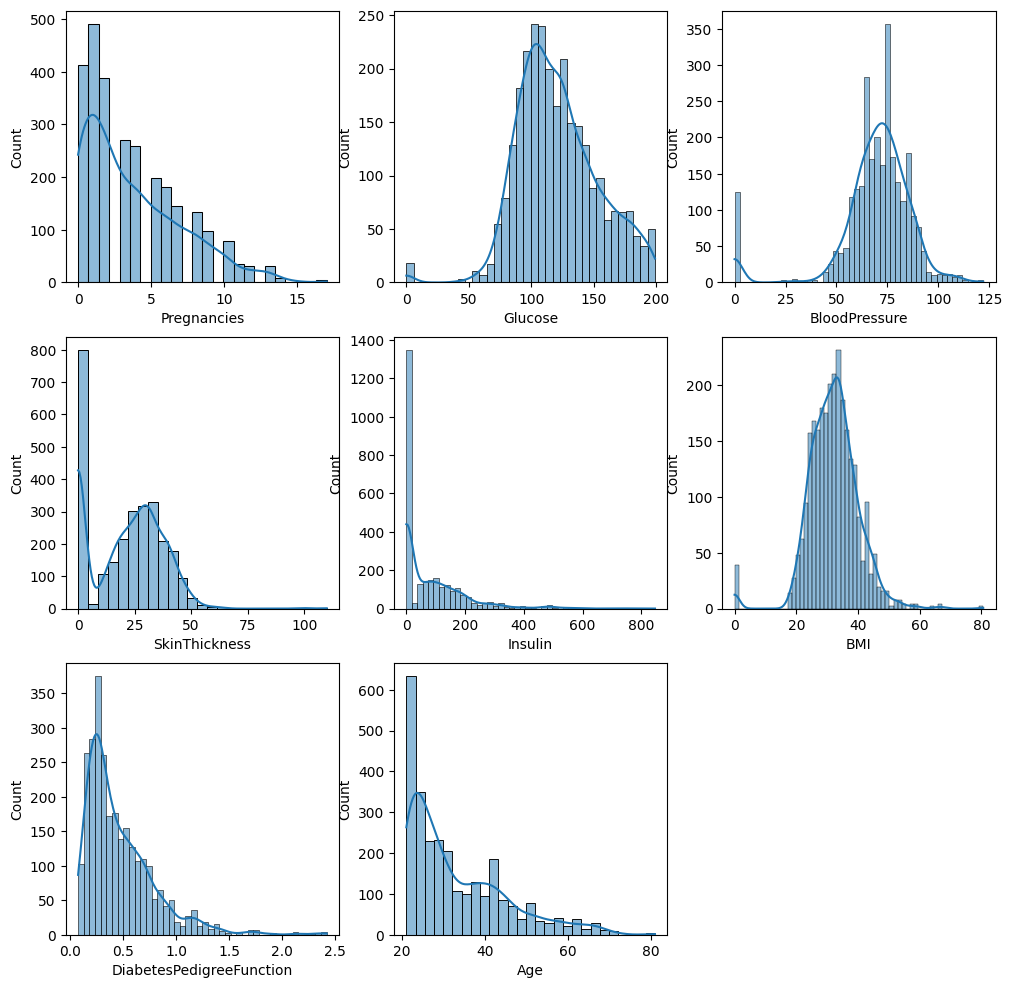

In [13]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

Each feature is plotted to understand its distribution. For example, variables like Glucose and BMI are expected to have skewed distributions since extreme values often indicate diabetes risk.


**Correlation Heatmap**

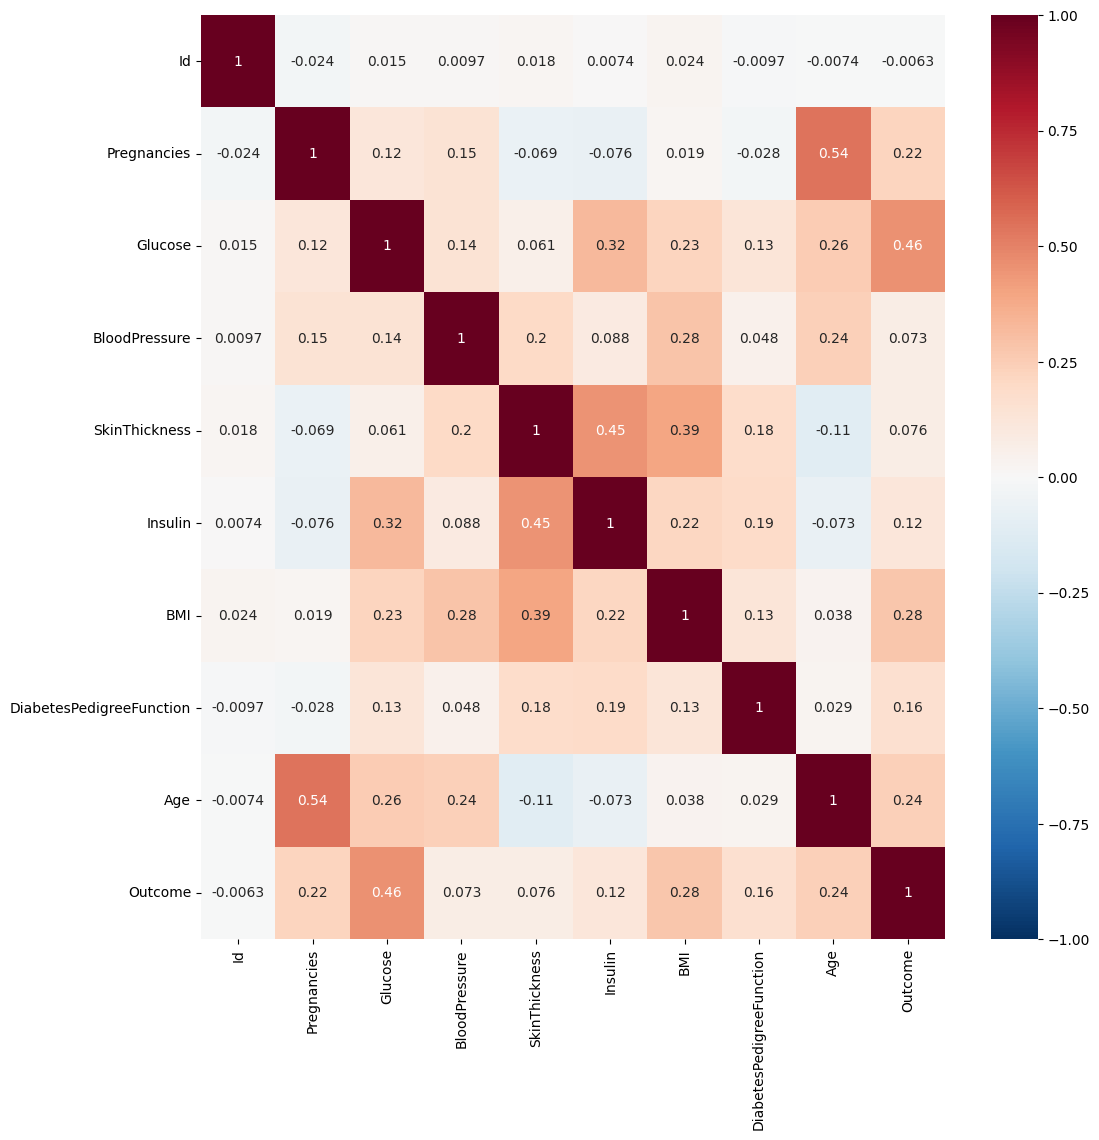

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), vmin = -1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

The heatmap reveals the strength of relationships between features. Glucose, BMI, and Age are likely to have higher correlations with Outcome, indicating their predictive power for diabetes.
This correlation analysis helps decide which features are most important to keep for model training.

**Scaling and Label Encoding**

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(['Outcome'], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])


In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.731425,0.679232,0.839738,0.149033,0.882845,-0.713633,0.181135,0.478509,1.432495
1,-1.730174,-0.825341,-1.127124,-0.163012,0.509169,-0.713633,-0.685773,-0.369130,-0.181079
2,-1.728922,1.281062,1.932439,-0.267027,-1.296931,-0.713633,-1.094459,0.616712,-0.096154
3,-1.727671,-0.825341,-1.002244,-0.163012,0.135494,0.123547,-0.500007,-0.934224,-1.030329
4,-1.726419,-1.126256,0.496317,-1.515209,0.882845,0.782604,1.357654,5.579704,-0.011229


In [33]:
y = data['Outcome']

Scaling ensures that variables with large ranges (Glucose vs Pregnancies) do not disproportionately influence the model. This is crucial for distance-based algorithms like KNN.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The dataset is split into training 70% and testing 30% sets to train the model on one portion of the data and evaluate it on unseen data. This ensures the model's generalizability.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [40]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max Train score 100.0 % and k = [1]


In [42]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max Test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max Test score 88.4476534296029 % and k = [1]


Max Train and Test Scores: The best value of k is selected based on the test accuracy, which represents the model's performance on unseen data.
A good balance between train and test scores indicates that the model is not overfitting.

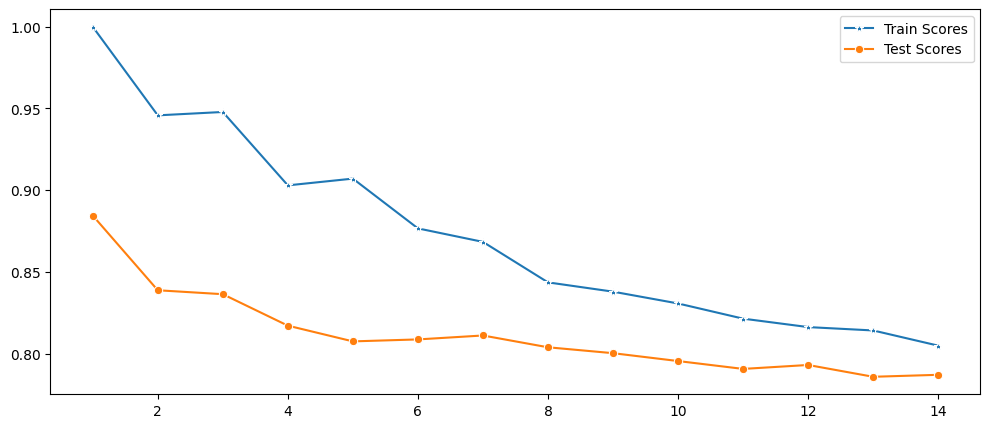

In [45]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Scores')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Scores')

The line plot shows how train and test accuracy change with different values of k.
Typically, you see that for small values of k (for example k=1), the model overfits. As k increases, the test accuracy improves until reaching an optimal value, after which it starts to decline.

In [46]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8844765342960289

After determining the optimal k (in this case, k=1), the model is trained, and its test accuracy is calculated. This provides the final performance evaluation of the KNN model on the test data.

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[505,  50],
       [ 46, 230]])

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. This helps identify how well the model distinguishes between diabetic and non-diabetic cases and whether it tends to make more false positives or false negatives.

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       555
           1       0.82      0.83      0.83       276

    accuracy                           0.88       831
   macro avg       0.87      0.87      0.87       831
weighted avg       0.88      0.88      0.88       831



The model performs very well overall with an accuracy of 88%.
(0 - Non-Diabetic) has slightly better performance (F1-score of 0.91) than (1 - Diabetic) (F1-score of 0.83). This is typical in medical data where identifying the minority diabetics is often more challenging.
The relatively lower recall for diabetic suggests the model is missing some diabetic cases.